In [128]:
import pandas as pd
from datetime import datetime, timedelta
%matplotlib inline
import json

In [2]:
data = pd.read_csv("data/116",sep = "\t" , header = None)
# data.head()

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:01:30,-1,-1,2015-07-01 00:01:34
1,GPS,粤E19207,116,-1,113.09928,23.05066,2015-07-01 00:01:30,-1,-1,2015-07-01 00:01:34
2,GPS,粤E16952,116,-1,113.14620,23.02110,2015-07-01 00:01:25,-1,-1,2015-07-01 00:01:34
3,GPS,粤E19205,116,-1,113.14623,23.02135,2015-07-01 00:01:31,-1,-1,2015-07-01 00:01:35
4,GPS,粤E17022,116,-1,113.14618,23.02138,2015-07-01 00:01:30,-1,-1,2015-07-01 00:01:35


In [113]:
bus1 = data[data[1] == "粤E19204"]


bus1 = bus1[(bus1[4]> 112) & (bus1[4]<114)]
bus1 = bus1[(bus1[5]> 22) & (bus1[5]<24)]

seconds = [str(s).zfill(2)  for s in range(60)]
minutes = [str(s).zfill(2)  for s in range(60)]
hours = [str(s).zfill(2)  for s in range(24)]
months = [str(s).zfill(2)  for s in range(1,13)]


bus1 = bus1[bus1[6].str[-2:].isin(seconds)]
bus1 = bus1[bus1[6].str[-5:-3].isin(minutes)]
bus1 = bus1[bus1[6].str[-8:-6].isin(hours)]
bus1 = bus1[bus1[6].str[5:7].isin(months)]
bus1 = bus1[bus1[6].str[:4].isin(["2015"])]

bus1 = bus1.reset_index(drop=True)
bus1.shape


(495957, 10)

In [75]:
start_range = [(113.145, 113.147), (23.0205, 23.0225)]

end_range = [(113.0165, 113.0185)  , (23.046, 23.048)]

shifts = []
# temp = [(bus1.loc[0][4], bus1.loc[0][4], 0) ]
for i in bus1.index:
    if bus1.loc[i,4] < start_range[0][1] and bus1.loc[i,4] > start_range[0][0] and bus1.loc[i,5] < start_range[1][1] and bus1.loc[i,5] > start_range[1][0]:
        temp = [(i, bus1.loc[i,4], bus1.loc[i,5])]
    elif bus1.loc[i,4] < end_range[0][1] and bus1.loc[i,4] > end_range[0][0] and bus1.loc[i,5] < end_range[1][1] and bus1.loc[i,5] > end_range[1][0]:
        if len(temp)>800 and len(temp)<2500:
            shifts.append(temp)
        temp = []
    elif len(temp)>0:
        temp.append((i, bus1.loc[i,4], bus1.loc[i,5]))
        
    
            
            
for i in shifts:
    print len(i)
# bus1.loc[0,4]


1251
1236
1174
1211
1026
1027
997
1717
1386
1548
1315
1311
1400
1337
1380
972
1216
1126
1341
1839
1329
1591
1433
1130
1370
1633
1327
1399
1283
912
1330
1375
1544
1446
1359
1320
1466
1465
1273
880
1333
1499


In [152]:

extract_shift = []
temp = []

for shift in shifts[:]:
    ind = [s[0] for s in shift]
    
    timelist = list(pd.to_datetime(bus1.loc[ind][6]))
    timelist = [timedelta.total_seconds(t-timelist[0]) for t in timelist if timedelta.total_seconds(t-timelist[0])< 20000]
    xlist = list(bus1.loc[ind][4])
    ylist = list(bus1.loc[ind][5])
    temp = zip(xlist, ylist, timelist)
    
    if min(timelist)<0 or max(xlist)>113.4:
        continue
    extract_shift.append(temp)

   


print len(extract_shift)

# timedelta.total_seconds((pd.to_datetime(bus1[6])[5] - pd.to_datetime(bus1[6])[0]))
# timelist

38


In [153]:
# [i[0] for i in shifts[2]][0],[i[0] for i in shifts[2]][-1]
# extract_shift[0]
datalist = [[{"x":point[0], "y":point[1], "t":point[2]} for point in shift] for shift in extract_shift]
# datalist
fout =  open("116.json","w")
json.dump(datalist, fout)



In [154]:
f = open("116.json","r")
d = json.loads(f.read())
print d

[[{u'y': 23.0207, u'x': 113.14588, u't': 0.0}, {u'y': 23.0204, u'x': 113.14558000000001, u't': 4.0}, {u'y': 23.0204, u'x': 113.14558000000001, u't': 10.0}, {u'y': 23.0202, u'x': 113.14551000000002, u't': 14.0}, {u'y': 23.02003, u'x': 113.14555, u't': 20.0}, {u'y': 23.02003, u'x': 113.14555, u't': 25.0}, {u'y': 23.02003, u'x': 113.14555, u't': 27.0}, {u'y': 23.01983, u'x': 113.14518000000001, u't': 30.0}, {u'y': 23.01985, u'x': 113.14495, u't': 36.0}, {u'y': 23.01985, u'x': 113.14495, u't': 41.0}, {u'y': 23.01985, u'x': 113.14495, u't': 46.0}, {u'y': 23.01985, u'x': 113.14495, u't': 51.0}, {u'y': 23.01985, u'x': 113.14495, u't': 56.0}, {u'y': 23.01985, u'x': 113.14495, u't': 61.0}, {u'y': 23.01985, u'x': 113.14495, u't': 66.0}, {u'y': 23.01985, u'x': 113.14495, u't': 71.0}, {u'y': 23.01985, u'x': 113.14495, u't': 76.0}, {u'y': 23.01985, u'x': 113.14495, u't': 81.0}, {u'y': 23.01985, u'x': 113.14495, u't': 81.0}, {u'y': 23.01985, u'x': 113.14495, u't': 86.0}, {u'y': 23.01985, u'x': 113.1

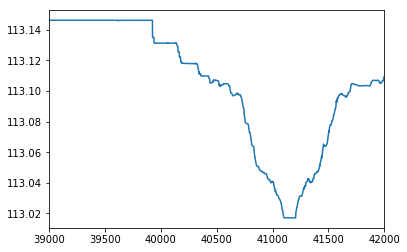

In [89]:
bus1.loc[39000:42000,4].plot()

In [5]:
# bus1.
# bus1

# bus1[5].describe()
bus1 = bus1.reset_index(drop=True)
bus1

,0,1,2,3,4,5,6,7,8,9
0,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:01:30,-1,-1,2015-07-01 00:01:34
1,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:01:35,-1,-1,2015-07-01 00:01:39
2,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:01:40,-1,-1,2015-07-01 00:01:44
3,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:01:45,-1,-1,2015-07-01 00:01:47
4,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:01:50,-1,-1,2015-07-01 00:01:54
5,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:01:55,-1,-1,2015-07-01 00:01:58
6,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:02:00,-1,-1,2015-07-01 00:02:05
7,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:02:00,-1,-1,2015-07-01 00:02:06
8,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:02:05,-1,-1,2015-07-01 00:02:09
9,GPS,粤E19204,116,-1,113.14631,23.02181,2015-07-01 00:02:10,-1,-1,2015-07-01 00:02:14


In [20]:
# datetime.strptime()

# data[6][0]

# datetime.strptime(data[6][0],'%Y-%m-%d %H-')

# pd.to_datetime(data.loc[:1000][6])

# data[6]

# bus1
not_working = []
last_loc = (bus1.loc[0][4], bus1.loc[0][5])

# last_loc
caching = []
for i in range(bus1.shape[0]):
    if bus1.loc[i][4] == last_loc[0] and bus1.loc[i][5] == last_loc[1]:
        caching.append(i)
    else:
        if len(caching) > 0:
            not_working = not_working + caching
        caching = []
        last_loc = (bus1.loc[i][4], bus1.loc[i][5])

len(not_working)
# bus1.loc[5]

# bus1.shape

# for 

# data

340313

In [14]:
bus1_valid = bus1.drop(bus1.index[not_working])
bus1_valid.head(100)

,0,1,2,3,4,5,6,7,8,9
1937,GPS,粤E19204,116,-1,113.14628,23.02175,2015-07-01 02:32:38,-1,-1,2015-07-01 02:32:43
1938,GPS,粤E19204,116,-1,113.14626,23.02173,2015-07-01 02:32:43,-1,-1,2015-07-01 02:32:47
1939,GPS,粤E19204,116,-1,113.14626,23.02173,2015-07-01 02:32:48,-1,-1,2015-07-01 02:32:52
1940,GPS,粤E19204,116,-1,113.14628,23.02175,2015-07-01 02:32:53,-1,-1,2015-07-01 02:32:57
1941,GPS,粤E19204,116,-1,113.14628,23.02175,2015-07-01 02:32:58,-1,-1,2015-07-01 02:33:03
1942,GPS,粤E19204,116,-1,113.14628,23.02175,2015-07-01 02:33:03,-1,-1,2015-07-01 02:33:07
1943,GPS,粤E19204,116,-1,113.14628,23.02175,2015-07-01 02:33:08,-1,-1,2015-07-01 02:33:12
1944,GPS,粤E19204,116,-1,113.14628,23.02175,2015-07-01 02:33:13,-1,-1,2015-07-01 02:33:18
1945,GPS,粤E19204,116,-1,113.14628,23.02175,2015-07-01 02:33:18,-1,-1,2015-07-01 02:33:22
1946,GPS,粤E19204,116,-1,113.14628,23.02175,2015-07-01 02:33:23,-1,-1,2015-07-01 02:33:28


In [143]:
# caching[:10]
# 342658

# bus1.loc[not_working][4].unique()
# bus1.loc[not_working][4].value_counts()
# 22.983740, 113.136869

In [26]:
valid_shift = []
temp = []
for i in bus1_valid.index:
    if temp == []:
        temp.append(i)
    elif temp[-1] > i-10:
        temp.append(i)
    else:
        valid_shift.append(temp)
        temp = []
# for t in valid_shift:
#     print len(t)
    

lenmap = [len(i) for i in valid_shift]
print lenmap
# print valid_shift[:2]

# print valid_shift[3]    

[51, 8, 251, 1013, 1158, 235, 49, 2389, 160, 56, 44, 1837, 135, 46, 1841, 104, 49, 26, 2660, 49, 1446, 1635, 57, 74, 43, 1053, 1060, 281, 54, 27, 266, 1755, 188, 137, 57, 60, 60, 47, 2042, 51, 65, 246, 156, 773, 1607, 75, 67, 504, 61, 356, 300, 2315, 899, 961, 957, 822, 233, 1548, 57, 60, 46, 319, 2266, 232, 54, 248, 429, 1802, 193, 58, 55, 59, 274, 2359, 39, 257, 513, 325, 1668, 49, 58, 59, 275, 1020, 1231, 58, 4, 515, 2920, 49, 51, 248, 2565, 59, 17, 444, 414, 1404, 54, 54, 59, 141, 793, 1129, 55, 34, 589, 1541, 152, 348, 74, 903, 57, 1178, 52, 42, 47, 2271, 65, 42, 1378, 111, 49, 299, 1009, 1430, 442, 712, 243, 3054, 157, 54, 53, 41, 312, 964, 1391, 64, 299, 2628, 296, 67, 36, 7, 227, 2005, 241, 62, 1141, 1417, 42, 61, 205, 1029, 1376, 60, 369, 2493, 225, 43, 55, 60, 175, 950, 1218, 39, 296, 2399, 54, 65, 60, 217, 893, 1340, 55, 2272, 41, 22, 50, 239, 927, 1327, 68, 242, 927, 1558, 63, 63, 57, 200, 2500, 49, 230, 2476, 19, 20, 45, 224, 1681, 167, 244, 1019, 1271, 72, 55, 1808, 256, 

In [48]:
# bus1_valid.loc[valid_shift[5]]
bus1_valid.loc[6025:6125]

,0,1,2,3,4,5,6,7,8,9
6025,GPS,粤E19204,116,-1,113.01710,23.04680,2015-07-01 08:01:25,-1,-1,2015-07-01 08:01:31
6026,GPS,粤E19204,116,-1,113.01710,23.04678,2015-07-01 08:01:30,-1,-1,2015-07-01 08:01:35
6027,GPS,粤E19204,116,-1,113.01710,23.04678,2015-07-01 08:01:35,-1,-1,2015-07-01 08:01:41
6028,GPS,粤E19204,116,-1,113.01710,23.04678,2015-07-01 08:01:40,-1,-1,2015-07-01 08:01:46
6029,GPS,粤E19204,116,-1,113.01710,23.04680,2015-07-01 08:01:45,-1,-1,2015-07-01 08:01:50
6104,GPS,粤E19204,116,-1,113.04890,23.04326,2015-07-01 08:07:47,-1,-1,2015-07-01 08:07:51
6105,GPS,粤E19204,116,-1,113.04890,23.04326,2015-07-01 08:07:52,-1,-1,2015-07-01 08:07:59
6106,GPS,粤E19204,116,-1,113.04890,23.04326,2015-07-01 08:07:57,-1,-1,2015-07-01 08:08:03
6107,GPS,粤E19204,116,-1,113.01898,23.04765,2015-07-01 08:08:03,-1,-1,2015-07-01 08:08:08
6108,GPS,粤E19204,116,-1,113.01898,23.04765,2015-07-01 08:08:08,-1,-1,2015-07-01 08:08:13


In [60]:
# bus1_valid.loc[4000:9500][5].plot()

In [61]:
# bus1_valid.loc[:100000,5].plot()

In [64]:
# bus1_valid.loc[20000,4:5]